In [74]:
!pip install --upgrade librosa


  Using cached librosa-0.10.0-py3-none-any.whl (252 kB)
  Attempting uninstall: librosa
    Found existing installation: librosa 0.7.2
    Uninstalling librosa-0.7.2:
      Successfully uninstalled librosa-0.7.2


In [57]:
import librosa 
import matplotlib.pyplot as plt
from scipy import stats
import IPython.display as ipd
import numpy as np
%matplotlib inline


# Feature Extraction Explained 


Load in Food by AWOL (1st song in the df) to explain features and how they are extracted and what they mean.

`x` refers to the audio time series. It is a one-dimensional numpy array that represents the amplitude of the audio signal over time. The values of x are usually floating-point numbers that range from -1 to 1. #normalized 1 is max pos amplitude -1 is max neg

The sr rate in librosa refers to the sampling rate of an audio signal. It represents the number of samples per second that were taken to represent the analog audio signal digitally. In other words, it is the number of times the audio wave was sampled per second.

The value of sr is expressed in Hz (Hertz), which means the number of samples per second. For example, an sr of 44100 Hz means that 44100 samples were taken per second to represent the audio signal digitally.

In librosa, sr is typically specified when loading an audio file, and it is used in many audio analysis functions to compute time-related features and to resample the audio signal to a different sampling rate if necessary.

In [73]:

x, sr = librosa.load('Data/Audio/AWOL - Food.mp3',sr=None, mono = True)
print(type(x), type(sr))
len(x)

## 167 seconds x 22050 samples/second ~ 370,000 samples in this audio
# In this context, the term "samples" refers to the number of audio samples that have been recorded in the audio file.
# Each audio sample corresponds to the amplitude of the audio signal at a specific point in time, 
# so the total number of samples in the audio file reflects the duration of the audio signal and the sampling rate used to record it.

<class 'numpy.ndarray'> <class 'int'>


7402752

Below is the song itself, playable through jupyter notebook. 

In [39]:
ipd.Audio('Data/Audio/AWOL - Food.mp3')

A waveform represents the amplitude of an audio signal over time. It can be used to visualize the changes in air pressure (sound waves) that are picked up by a microphone and converted into an electrical signal. A waveform plot displays the amplitude of the audio signal on the y-axis and time on the x-axis. This type of visualization can help to identify various characteristics of the audio signal, such as its overall loudness, dynamics, and frequency content.

No, a spectrogram is not the same as a waveform.

A waveform is a one-dimensional plot that shows the changes in the amplitude of a sound signal over time. The x-axis represents time, and the y-axis represents amplitude. A waveform is a plot of the raw audio signal, and it gives information about the sound's intensity and timing.

On the other hand, a spectrogram is a two-dimensional plot that shows the frequency content of a sound signal over time. The x-axis represents time, the y-axis represents frequency, and the color of each point in the plot represents the magnitude (amplitude) of the frequency component at that time. A spectrogram gives information about the frequency content of the sound and how it changes over time.

In summary, a waveform represents the raw audio signal, while a spectrogram represents the frequency content of the signal over time.

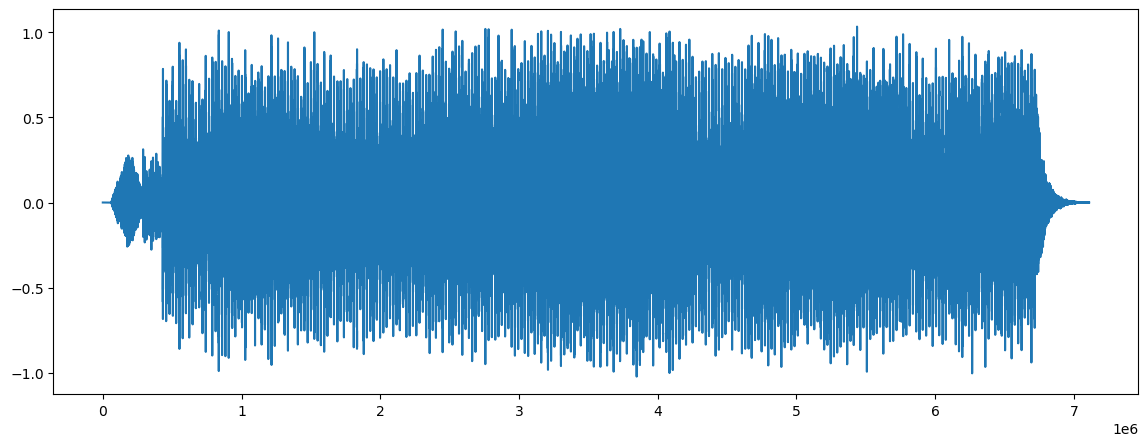

In [38]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
plt.plot(x)
plt.show()

This line of code computes the zero-crossing rate (ZCR) of the audio signal x. ZCR is a measure of how many times the audio waveform crosses the zero-axis. It is often used as a feature for tasks such as speech recognition, music genre classification, and audio segmentation.

The frame_length parameter determines the length of each analysis frame in samples, and the hop_length parameter determines the number of samples between successive frames. In this case, each frame is 2048 samples long and adjacent frames are separated by 512 samples.

The librosa.feature.zero_crossing_rate() function calculates the rate of zero-crossings per time frame, rather than the total number of zero-crossings in the signal. It does this by first calculating the number of zero-crossings in each time frame (based on the specified frame_length and hop_length), and then dividing by the duration of each frame to get the rate.

In [75]:
def stat_features(values):
    

IndentationError: expected an indented block (189743401.py, line 1)

In [59]:
zcr = librosa.feature.zero_crossing_rate(x, frame_length=2048, hop_length=512)

In [60]:
print(np.std(zcr,axis=1))

[0.04032087]


In [61]:
print(np.mean(zcr, axis=1))

[0.07747052]


In [62]:
zcr.dtype

dtype('float64')

In [63]:
print(np.median(zcr))

0.07177734375


In [64]:
print(np.max(zcr))

0.4375


librosa.cqt stands for Constant-Q Transform (CQT), which is a type of signal processing technique used to represent a signal in the time-frequency domain. It is similar to the Fourier transform but uses a logarithmic frequency axis that better represents the way humans perceive sound. CQT is often used in audio analysis tasks such as music information retrieval and speech processing. In librosa, the cqt function can be used to compute the CQT of an audio signal.

This code will produce a CQT spectrogram plot with time on the x-axis and frequency on the y-axis. The bins_per_octave parameter determines the resolution of the CQT, and the n_bins parameter sets the number of frequency bins to compute. The librosa.amplitude_to_db function is used to convert the amplitude of the CQT to a decibel scale for better visualization.

The colorbar in a CQT spectrogram plot shows the relative amplitude of each frequency bin in the CQT, in decibels (dB) relative to the maximum amplitude in the spectrogram.

The colorbar represents the dynamic range of the CQT spectrogram in terms of loudness. The dB scale is a logarithmic scale that relates the amplitude of the signal to the human perception of loudness. The colorbar is typically placed on the right side of the spectrogram plot, and its ticks indicate the decibel values.

The color of each pixel in the spectrogram corresponds to the decibel value of the amplitude at that frequency bin and time frame. The brighter the color, the higher the amplitude of the signal at that frequency and time. The color scale is often represented using a diverging color scheme, where red indicates positive values (amplitudes above 0 dB), blue indicates negative values (amplitudes below 0 dB), and white indicates 0 dB (no amplitude).



TypeError: __init__() got an unexpected keyword argument 'basey'

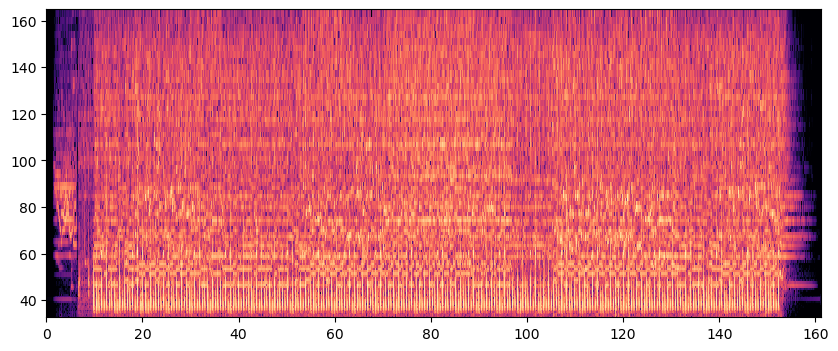

In [47]:
cqt = np.abs(librosa.cqt(x, sr=sr, hop_length=512, bins_per_octave=12,
                                 n_bins=7*12, tuning=None))

# Plot the CQT
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max),
                         sr=sr, x_axis='time', y_axis='cqt_note',
                         bins_per_octave=12*3)
plt.colorbar(format='%+2.0f dB')
plt.title('CQT spectrogram')
plt.tight_layout()
plt.show()


The function librosa.feature.chroma_cqt() computes the chroma feature of a CQT (Constant-Q Transform) spectrogram. The chroma feature represents the distribution of musical pitch classes in the audio signal and is commonly used in music information retrieval tasks such as music genre classification, chord recognition, and melody extraction.

The function takes a CQT spectrogram as input, which is typically computed using the librosa.cqt() function. The n_chroma parameter specifies the number of chroma bins to use, which is typically set to 12 to represent the 12 distinct pitch classes in Western music. The n_octaves parameter specifies the number of octaves to consider in the CQT, which determines the resolution of the chroma feature.

The output of the librosa.feature.chroma_cqt() function is a matrix with dimensions (n_chroma, n_frames), where n_frames is the number of time frames in the CQT spectrogram. Each column of the matrix represents the chroma feature vector for a specific time frame in the audio signal.

In [66]:
chroma_cqt = librosa.feature.chroma_cqt(C=cqt, n_chroma=12, n_octaves=7)
chroma_cqt.shape

(12, 13888)

In [67]:
# 4.52E+00
stats.kurtosis(chroma_cqt[1])

-0.020764891890169945

In [70]:
np.mean(chroma_cqt[0])

0.38766867

In [71]:
np.std(chroma_cqt[0])

0.22622481

In [ ]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))

In [ ]:
What might stand out 